In [187]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
fn = "C:/Users/User/Documents/Leeds/lsdiaga_1982_2021_sat_ts_5day.txt"
ln = 725997

In [188]:
line_numbers = np.arange(725997,ln+(139*100)) ## I just picked an arbitrary range of line numbers because I didn't want to
                                              ## do the whole dataset   


storms = []
storm_name = "NULL"


with open(fn, 'r') as fp:
    for i, line in enumerate(fp):
        # read lines
        if i in line_numbers:
            lines.append(line.strip())
            if "HEAD" in line.strip():
                head_nums.append(i) 
                if storm_name == line[39:55].strip():
                    pass
                else:
                    print(storm_name)
                    if storm_name == "NULL":
                        pass
                    else:
                        data = np.transpose(np.stack([dates,shear_speed,shear_dir]))
                        df = pd.DataFrame(data,
                                            columns=["Date","Shear speed (m/s)","Shear direction (deg)"],
                                         ).to_csv(storm_name+".csv",index = False)
                    
                    storm_name = line[39:55].strip(); storms.append(storm_name)
                    shear_speed, shear_dir, dates = [], [], []
                
                ## ADD THE DATE
                date_string = line.strip().split()[1] + line.strip().split()[2]
                time = datetime.strptime(date_string, "%y%m%d%H")
                dates.append(time)
            
            ## VARIABLES YOU WANT TO EXTRACT
            if "SDDC" in line.strip():
                shear_speed.append((float(line.strip().split()[0]) / 10) / 1.944) # T + 0 is column 0
            elif "SHGC" in line.strip():
                shear_dir.append(float(line.strip().split()[0])) # T + 0 is column 0
                
        elif i > line_numbers[-1]: ## stop when you reach the last line number, you can remove this line to do whole dataset
            break

NULL
AL012000
AL022000
AL032000


### Each storm now has its own .csv file 

In [219]:
print(storms[:-1])

for storm in storms[:-1]:
    data = pd.read_csv(storm+".csv")
    print(data)

['AL012000', 'AL022000', 'AL032000']
                  Date  Shear speed (m/s)  Shear direction (deg)
0  2000-06-07 18:00:00           4.732510                  248.0
1  2000-06-08 00:00:00           4.269547                  248.0
2  2000-06-08 06:00:00           4.681070                  260.0
3  2000-06-08 12:00:00           5.658436                  271.0
                   Date  Shear speed (m/s)  Shear direction (deg)
0   2000-06-23 00:00:00          13.837449                  482.0
1   2000-06-23 06:00:00          14.248971                  478.0
2   2000-06-23 12:00:00          14.557613                  457.0
3   2000-06-23 18:00:00          14.506173                  260.0
4   2000-06-24 00:00:00          14.506173                  230.0
5   2000-06-24 06:00:00          14.969136                  231.0
6   2000-06-24 12:00:00          15.020576                  177.0
7   2000-06-24 18:00:00          14.763374                  189.0
8   2000-06-25 00:00:00          15.483539  

### Plot the data 

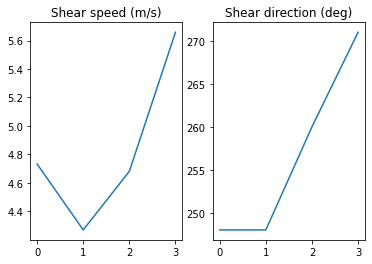

In [212]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot(data['Date'],data['Shear speed (m/s)'])
ax1.set_title("Shear speed (m/s)")

ax2.plot(data['Date'],data['Shear direction (deg)'])
ax2.set_title("Shear direction (deg)")

for ax in [ax1,ax2]:
    ax.set_xticklabels(np.arange(0,4))